<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/shufflingUnderConstraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [633]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [634]:
# Define the cards
clubs = ['club 2', 'club 3', 'club 4', 'club 5', 'club 6']
diamonds = ['diamond 2', 'diamond 3', 'diamond 4', 'diamond 5', 'diamond 6']
hearts = ['heart 2', 'heart 3', 'heart 4', 'heart 5', 'heart 6']
spades = ['spade 2', 'spade 3', 'spade 4']

In [635]:
all_cards = clubs + diamonds + hearts + spades

In [636]:
len(all_cards)

18

In [637]:
# Define constraints
club_spade_positions = [0, 3, 6, 9, 12, 15]      # No clubs or spades
heart_positions = [1, 4, 7, 10, 13]          # No hearts
diamond_spade_positions = [2, 5, 8, 11, 14, 17]  # No diamonds or spades

In [638]:
# Function to check if an allocation is legal
def is_legal_allocation(positions):
    for i in club_spade_positions:
        if 'club' in positions[i] or 'spade' in positions[i]:
            return False
    for i in heart_positions:
        if 'heart' in positions[i]:
            return False
    for i in diamond_spade_positions:
        if 'diamond' in positions[i] or 'spade' in positions[i]:
            return False
    return True

In [639]:
# Start with a legal allocation
def initial_legal_allocation():
    # random.shuffle(clubs)
    # random.shuffle(diamonds)
    # random.shuffle(hearts)
    # random.shuffle(spades)

    # positions = [None] * 18
    # for pos in club_spade_positions:
    #     positions[pos] = clubs.pop() if clubs else spades.pop()
    # for pos in heart_positions:
    #     positions[pos] = hearts.pop()
    # for pos in diamond_spade_positions:
    #     positions[pos] = diamonds.pop() if diamonds else spades.pop()
    # return positions
    legal_allocation = ['diamond 2', 'spade 4', 'club 3', 'diamond 3', 'club 4', 'club 5', 'diamond 4', 'club 6', 'heart 2', 'diamond 5', 'diamond 6', 'heart 3', 'heart 4', 'spade 2', 'heart 5', 'heart 6', 'spade 3', 'club 2']
    return legal_allocation

In [640]:
example = initial_legal_allocation()
example

['diamond 2',
 'spade 4',
 'club 3',
 'diamond 3',
 'club 4',
 'club 5',
 'diamond 4',
 'club 6',
 'heart 2',
 'diamond 5',
 'diamond 6',
 'heart 3',
 'heart 4',
 'spade 2',
 'heart 5',
 'heart 6',
 'spade 3',
 'club 2']

In [641]:
is_legal_allocation(example)

True

In [642]:

def markov_chain_step(positions):
    indices = random.sample(range(15), 3)  # Choose three random positions
    cards = [positions[i] for i in indices]

    # Attempt different swaps
    swap_options = [
        (0, 1), (0, 2), (1, 2),  # Pairwise swaps
        (0, 1, 2), (0, 2, 1)     # Cyclic swaps (A->B->C, A->C->B)
    ]
    random.shuffle(swap_options)  # Randomize the order of the swaps

    original_positions = positions[:]  # Keep a copy of the original allocation

    # Try each swap option
    for option in swap_options:
        new_positions = positions[:]
        if len(option) == 2:  # Simple swap
            new_positions[indices[option[0]]], new_positions[indices[option[1]]] = cards[option[1]], cards[option[0]]
        else:  # Cyclic swap
            new_positions[indices[option[0]]], new_positions[indices[option[1]]], new_positions[indices[option[2]]] = cards[option[1]], cards[option[2]], cards[option[0]]

        # Check if the new allocation is legal
        if is_legal_allocation(new_positions):
            return new_positions  # Accept the new allocation if it's legal

    return original_positions  # If no valid swaps, return the original allocation

In [643]:
# example = markov_chain_step(initial_legal_allocation())
# example

Want to have all of the possible legal allocations of the cards and run my algorithm a bunch of times, demonstrating the normal distribution across possible shuffles

In [644]:
# current_positions = initial_legal_allocation()
# current_positions

In [645]:
# all_positions = [current_positions]
# all_positions

In [646]:
# position_counts = defaultdict(lambda: [0] * 18)
# position_counts

In [647]:
# for _ in range(10):
#     new_positions = markov_chain_step(current_positions)
#     print(new_positions)
#     for i, card in enumerate(new_positions):
#         position_counts[card][i] += 1

In [648]:
# position_counts

In [649]:
# Collect position frequencies
def markov_chain_simulation(iterations):
    current_positions = initial_legal_allocation() # Start with legal allocation
    all_positions = [current_positions]
    position_counts = defaultdict(lambda: [0] * 18)

    for _ in range(iterations):
        current_positions = markov_chain_step(current_positions)
        for i, card in enumerate(current_positions):
            position_counts[card][i] += 1
    invariant_distribution = {card: [count / iterations for count in counts] for card, counts in position_counts.items()}
    return invariant_distribution, all_positions

In [650]:
iterations = 100000
invariant_distribution, all_positions = markov_chain_simulation(iterations)
invariant_distribution

{'diamond 2': [0.13027,
  0.07116,
  0.0,
  0.12537,
  0.07238,
  0.0,
  0.12665,
  0.07226,
  0.0,
  0.12979,
  0.07251,
  0.0,
  0.12596,
  0.07365,
  0.0,
  0.0,
  0.0,
  0.0],
 'spade 4': [0.0,
  0.2008,
  0.0,
  0.0,
  0.19564,
  0.0,
  0.0,
  0.1995,
  0.0,
  0.0,
  0.19833,
  0.0,
  0.0,
  0.20573,
  0.0,
  0.0,
  0.0,
  0.0],
 'heart 2': [0.08969,
  0.0,
  0.10212,
  0.08942,
  0.0,
  0.10847,
  0.08083,
  0.0,
  0.11727,
  0.09393,
  0.0,
  0.11179,
  0.09439,
  0.0,
  0.11209,
  0.0,
  0.0,
  0.0],
 'diamond 3': [0.13398,
  0.06479,
  0.0,
  0.12378,
  0.06693,
  0.0,
  0.13551,
  0.07205,
  0.0,
  0.12992,
  0.0744,
  0.0,
  0.12678,
  0.07186,
  0.0,
  0.0,
  0.0,
  0.0],
 'club 4': [0.0,
  0.0671,
  0.13369,
  0.0,
  0.06464,
  0.14228,
  0.0,
  0.06102,
  0.13602,
  0.0,
  0.06136,
  0.1379,
  0.0,
  0.06092,
  0.13507,
  0.0,
  0.0,
  0.0],
 'club 5': [0.0,
  0.05698,
  0.13961,
  0.0,
  0.05802,
  0.14446,
  0.0,
  0.06014,
  0.13774,
  0.0,
  0.06098,
  0.1403,
  0.0,


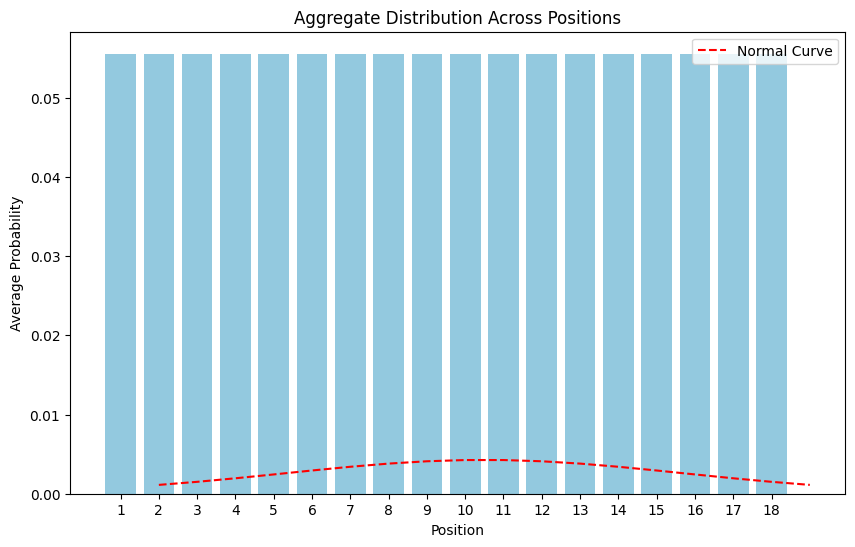

In [651]:

# Aggregate the probabilities across all cards for each position
positions_count = 18
position_probabilities = [0] * positions_count

# Sum the probabilities across all cards for each position
for card, probs in invariant_distribution.items():
    for i, prob in enumerate(probs):
        position_probabilities[i] += prob

# Normalize by the number of cards to get average probability per position
num_cards = len(invariant_distribution)
average_position_probabilities = [prob / num_cards for prob in position_probabilities]

# Plot the aggregate distribution
positions = np.arange(1, positions_count + 1)  # Position indices (1 to 15)

plt.figure(figsize=(10, 6))
sns.barplot(x=positions, y=average_position_probabilities, color='skyblue')
plt.xlabel('Position')
plt.ylabel('Average Probability')
plt.title('Aggregate Distribution Across Positions')

# Overlay a normal curve for comparison
mean = np.mean(positions)
std_dev = np.std(positions)
normal_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((positions - mean) / std_dev) ** 2)

plt.plot(positions, normal_curve * max(average_position_probabilities), color='red', linestyle='--', label='Normal Curve')
plt.legend()
plt.show()


In [630]:
distribution_df = pd.DataFrame(invariant_distribution)
distribution_df


,diamond 2,spade 4,club 3,heart 4,club 4,club 5,diamond 4,club 6,heart 2,diamond 5,diamond 6,heart 3,diamond 3,spade 2,heart 5,heart 6,spade 3,club 2
0,0.13305,0.00000,0.00000,0.08748,0.00000,0.00000,0.12511,0.00000,0.08449,0.13232,0.13204,0.08606,0.13218,0.00000,0.08727,0.0,0.0,0.0
1,0.07099,0.19747,0.05506,0.00000,0.05992,0.06105,0.08052,0.06281,0.00000,0.07034,0.07345,0.00000,0.07042,0.19797,0.00000,0.0,0.0,0.0
2,0.00000,0.00000,0.13797,0.10811,0.13894,0.13887,0.00000,0.14157,0.11107,0.00000,0.00000,0.10248,0.00000,0.00000,0.12099,0.0,0.0,0.0
3,0.12474,0.00000,0.00000,0.08697,0.00000,0.00000,0.12881,0.00000,0.08743,0.13363,0.13211,0.08839,0.13176,0.00000,0.08616,0.0,0.0,0.0
4,0.07258,0.20381,0.05771,0.00000,0.05970,0.06419,0.07024,0.06107,0.00000,0.06688,0.07432,0.00000,0.06979,0.19971,0.00000,0.0,0.0,0.0
5,0.00000,0.00000,0.13882,0.11141,0.13855,0.13545,0.00000,0.13646,0.11642,0.00000,0.00000,0.11561,0.00000,0.00000,0.10728,0.0,0.0,0.0
6,0.12955,0.00000,0.00000,0.09235,0.00000,0.00000,0.11958,0.00000,0.09358,0.13226,0.12469,0.09202,0.12499,0.00000,0.09098,0.0,0.0,0.0
7,0.06716,0.20357,0.06416,0.00000,0.06156,0.06509,0.07046,0.06238,0.00000,0.06790,0.07185,0.00000,0.07169,0.19418,0.00000,0.0,0.0,0.0
8,0.00000,0.00000,0.13422,0.11436,0.14008,0.13446,0.00000,0.14012,0.11138,0.00000,0.00000,0.10853,0.00000,0.00000,0.11685,0.0,0.0,0.0
9,0.12912,0.00000,0.00000,0.09022,0.00000,0.00000,0.13112,0.00000,0.08978,0.13160,0.12549,0.09403,0.12221,0.00000,0.08643,0.0,0.0,0.0


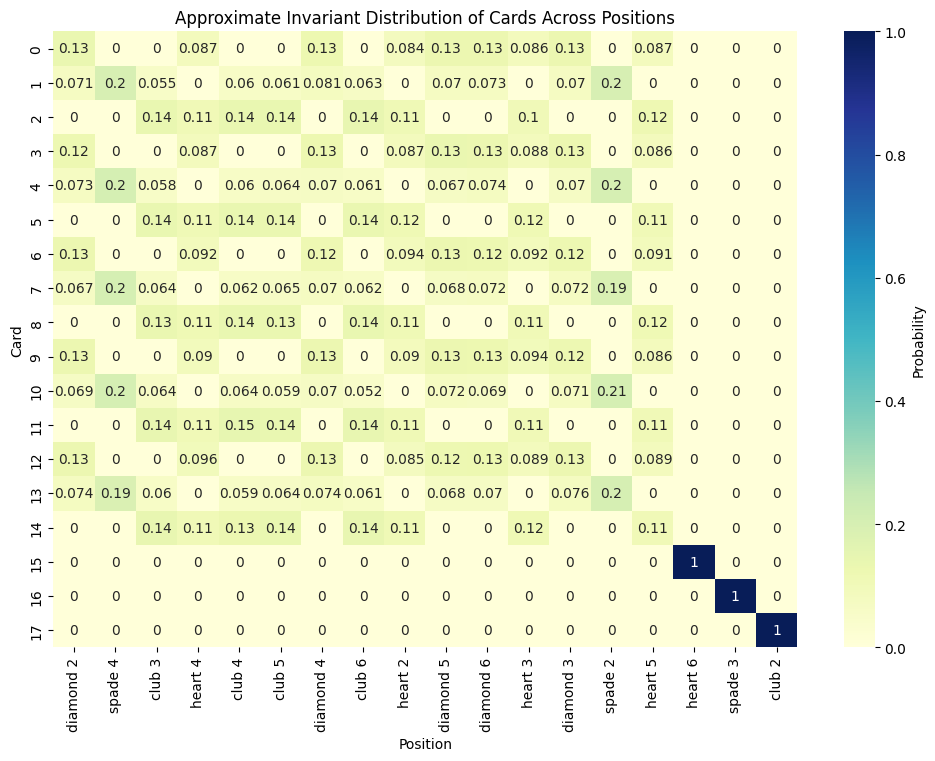

In [631]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distribution_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.title("Approximate Invariant Distribution of Cards Across Positions")
plt.xlabel("Position")
plt.ylabel("Card")
plt.show()
